In [38]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

In [5]:
def YuleWalkerACoefs (x, window):
    r = []
    r.append (np.mean (x[0:] * x[0:]))
    for i in range (1, window+1):
        r.append (np.mean (x[0:-i] * x[i:]))

    R = np.transpose (r[1:])

    FI = ConstructMatrixFi (window, r)

    aCoefs = np.linalg.inv(FI) * R

    return aCoefs

def YuleWalkerACoefsInverse (x, aCoefs, window):
    xhad = [0 for i in range (1, len(x)+1)]

    for m in range (window, len(x)):
        a_temp = np.array ([])
        a_2 = 0
        for j in range (window):
            a_temp = (aCoefs[j] * x[m - j - 1])
            a_2 += a_temp
        xhad[m] = np.sum (a_2)

    return xhad

def ConstructMatrixFi (n, r):
    FI = np.zeros ((n, n))
    for i in range (n):
        for j in range (n):
            distance = abs (i - j)
            FI[i, j] = r[distance]
    return FI

def ClosestSquare (array):
    a = np.floor (np.sqrt (array.shape[0]))
    while array.shape[0] % a:
        a -= 1
    return (int(a), int(array.shape[0]/a))

def PrintImageArray (array):
    print ("shape: ", array.reshape (ClosestSquare (array)).shape)
    plt.imshow (array.reshape (ClosestSquare (array)))
    plt.colorbar ()
    plt.show ()

def PrintArray (array):
    plt.plot (array)
    plt.show ()

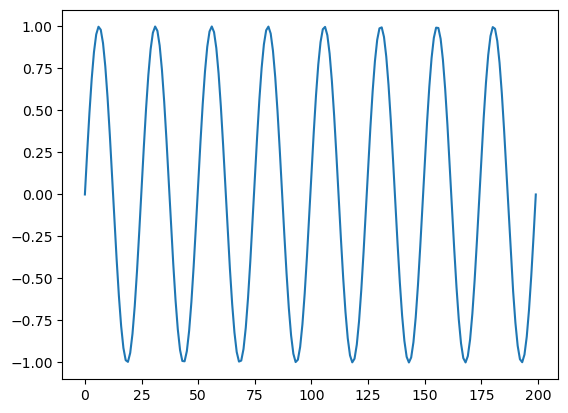

In [6]:
# n = np.arange (0, 100)
n = np.linspace (0, 4*np.pi, 200)

# x = (.5)**n + (.25)**n
# x = n**2
x = np.sin (n * 4)

PrintArray (x)

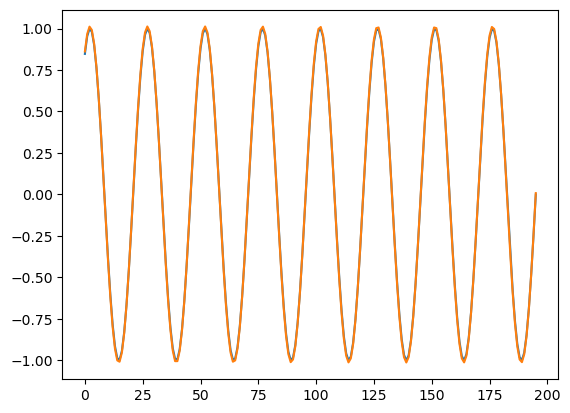

In [7]:
window = 4

xhad = YuleWalkerACoefsInverse (x, YuleWalkerACoefs (x, window), window)

plt.plot (x[window:])
plt.plot (xhad[window:])
plt.show ()

In [60]:
fs, data = wavfile.read ('file-example.wav')

C:\Users\PC\AppData\Local\Temp\ipykernel_7444\3184951727.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read ('file-example.wav')


In [61]:
print ('sample_rate: ', fs)

sample_rate:  44100


In [62]:
data.shape

(262094, 2)

In [63]:
data[:,0]

array([ 0,  0,  0, ..., -2,  0,  2], dtype=int16)

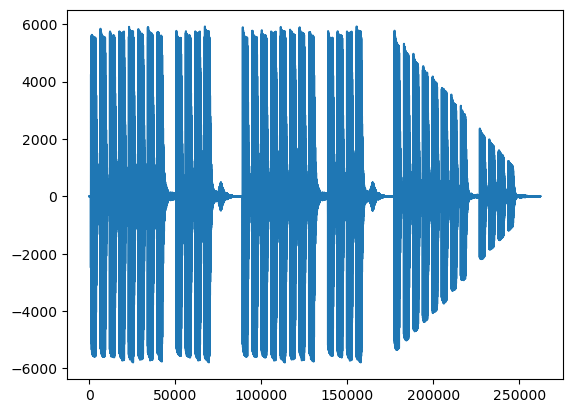

In [64]:
plt.plot (data[:, 0])

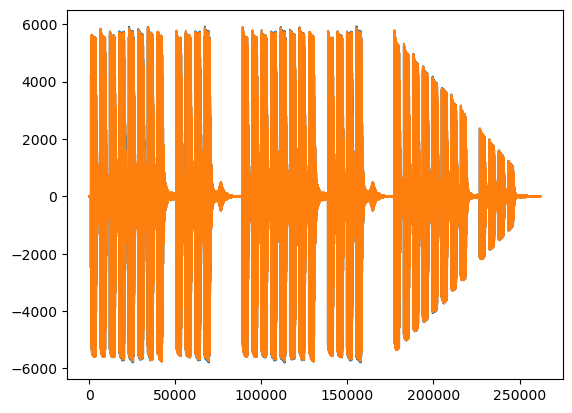

In [69]:
window = 4

wav_original = data[:, 0]

wav_reconstructed = np.int16(YuleWalkerACoefsInverse (wav_original, YuleWalkerACoefs (wav_original, window), window))

plt.plot (wav_original[window:])
plt.plot (wav_reconstructed[window:])
plt.show ()

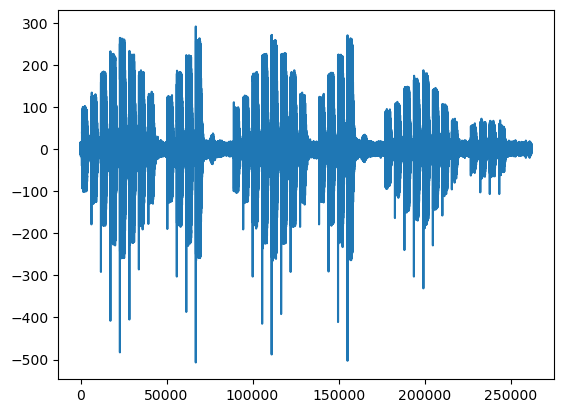

In [70]:
plt.plot (wav_original[window:] - wav_reconstructed[window:])
plt.show ()

In [71]:
type (wav_reconstructed)

numpy.ndarray

In [72]:
wavfile.write ('wav_reconstructed.wav', fs, np.int16(wav_reconstructed))